In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
from matplotlib import gridspec
import cmath
import scipy as scipy
from plot_utils import save_fig
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# plot settings
rc('axes', linewidth=3)
rc('text', usetex=True)
rc('font', size=24, family='arial', weight='bold')
rc('lines',linewidth=1.5,color='blue')
rc('xtick.major', pad=10, size=5, width=3)
rc('ytick.major', pad=10, size=5, width=3)

In [6]:
def filter_max_bondD(df):
    df = df.sort_values(by=['bondD'], ascending=False)
    df = df.reset_index()  # make sure indexes pair with number of rows
    data = []
    matching_attributes = ["Lx","lambda","mu_y","theta"]
    for index, row in df.iterrows():
        row_is_in_data=False
        for d in data:
            count = 0
            for key in matching_attributes:
                #print(key,d[key],row[key])
                if d[key]==row[key]:
                    count +=1
                else:
                    break

            #print(" ")
            if count == len(matching_attributes):
                row_is_in_data=True
                break

        if not row_is_in_data:
            data.append(row)
    return data

In [7]:
df = pd.read_csv(r'scan_zero_mu.dat' , delimiter='  ', skip_blank_lines=True)
data = filter_max_bondD(df)
df = pd.DataFrame(data[1:])
df = df.drop(columns="index")
df

/home/pkrah/Software/miniconda3/envs/sPOD/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Lx,lambda,mu_y,theta,bondD,Energy_GS,winding,eA,eB,MA,MB,U4,Oflip,Oflipp,charge
1,31.0,-0.28,0.0,0.0,160.0,-45.789549,-4.158900,20.624715,20.624715,-6.114780,-6.114780,0.983838,41.249429,-0.0,-0.0
2,31.0,-0.07,0.0,0.0,160.0,-37.727336,-1.796928,19.715229,19.715229,3.854523,3.854523,0.983093,39.430459,-0.0,0.0
3,31.0,-0.33,0.0,0.0,160.0,-47.864846,-4.825764,20.883823,20.883823,6.906000,6.906000,0.984039,41.767647,0.0,0.0
5,31.0,-0.05,0.0,0.0,160.0,-36.744158,-1.528404,19.612185,19.612185,3.649154,3.649154,0.983004,39.224370,-0.0,-0.0
6,31.0,-0.35,0.0,0.0,160.0,-48.912411,-5.173556,21.019493,21.019493,-7.342555,-7.342555,0.984142,42.038987,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,23.0,0.53,0.0,0.0,48.0,-8.733299,3.222294,9.559405,9.559405,-0.789102,-0.789102,0.965130,19.118809,0.0,0.0
619,23.0,0.55,0.0,0.0,48.0,-8.258782,3.390717,9.537052,9.537052,-0.456235,-0.456235,0.965049,19.074104,-0.0,-0.0
652,15.0,0.55,0.0,0.0,32.0,-4.925624,2.863186,5.618242,5.618242,-0.334293,-0.334293,0.940669,11.236484,-0.0,0.0
664,15.0,0.45,0.0,0.0,32.0,-6.781795,1.748775,6.441104,6.441104,-0.042384,-0.042384,0.948249,12.882207,-0.0,-0.0


In [8]:
lattsizes = df.Lx.to_numpy()
lattsizes = np.unique(lattsizes)
print(lattsizes)

[15. 23. 31.]


In [9]:
tempLAM  = np.array(df[(df['Lx']==15)]['lambda']); 
tempWIN = np.array(df[(df['Lx']==15)]['winding']);
tempEN  = np.array(df[(df['Lx']==15)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==15)]['MA']);    tempMB  = np.array(df[(df['Lx']==15)]['MB']);
tempeA  = np.array(df[(df['Lx']==15)]['eA']);    tempeB  = np.array(df[(df['Lx']==15)]['eB']);
tempOf  = np.array(df[(df['Lx']==15)]['Oflip']); 
tempU4  = np.array(df[(df['Lx']==15)]['U4']);
indL15   = tempLAM.argsort();
L15Lam = tempLAM[indL15]; L15Wind = tempWIN[indL15]; L15energy = tempEN[indL15];
L15eA = tempeA[indL15]; L15eB = tempeB[indL15];
L15MA = tempMA[indL15]; L15MB = tempMB[indL15]; L15Of = tempOf[indL15]; L15U4 = tempU4[indL15]
#
tempLAM  = np.array(df[(df['Lx']==23)]['lambda']); 
tempWIN = np.array(df[(df['Lx']==23)]['winding']);
tempEN  = np.array(df[(df['Lx']==23)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==23)]['MA']);    tempMB  = np.array(df[(df['Lx']==23)]['MB']);
tempeA  = np.array(df[(df['Lx']==23)]['eA']);    tempeB  = np.array(df[(df['Lx']==23)]['eB']);
tempOf  = np.array(df[(df['Lx']==23)]['Oflip']); 
tempU4  = np.array(df[(df['Lx']==23)]['U4']);
indL23   = tempLAM.argsort();
L23Lam = tempLAM[indL23]; L23Wind = tempWIN[indL23]; L23energy = tempEN[indL23];
L23eA = tempeA[indL23]; L23eB = tempeB[indL23];
L23MA = tempMA[indL23]; L23MB = tempMB[indL23]; L23Of = tempOf[indL23]; L23U4 = tempU4[indL23]
#
tempLAM  = np.array(df[(df['Lx']==31)]['lambda']); 
tempWIN = np.array(df[(df['Lx']==31)]['winding']);
tempEN  = np.array(df[(df['Lx']==31)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==31)]['MA']);    tempMB  = np.array(df[(df['Lx']==31)]['MB']);
tempeA  = np.array(df[(df['Lx']==31)]['eA']);    tempeB  = np.array(df[(df['Lx']==31)]['eB']);
tempOf  = np.array(df[(df['Lx']==31)]['Oflip']); 
tempU4  = np.array(df[(df['Lx']==31)]['U4']);
indL31   = tempLAM.argsort();
L31Lam = tempLAM[indL31]; L31Wind = tempWIN[indL31]; L31energy = tempEN[indL31];
L31eA = tempeA[indL31]; L31eB = tempeB[indL31];
L31MA = tempMA[indL31]; L31MB = tempMB[indL31]; L31Of = tempOf[indL31]; L31U4 = tempU4[indL31]


In [10]:
print(L15Lam, L15energy)

[-1.2  -1.18 -1.15 -1.13 -1.1  -1.07 -1.05 -1.02 -1.   -0.97 -0.95 -0.93
 -0.9  -0.88 -0.85 -0.82 -0.8  -0.78 -0.75 -0.72 -0.7  -0.68 -0.65 -0.63
 -0.6  -0.57 -0.55 -0.53 -0.5  -0.47 -0.45 -0.42 -0.4  -0.38 -0.35 -0.33
 -0.3  -0.28 -0.25 -0.23 -0.2  -0.17 -0.15 -0.13 -0.1  -0.07 -0.05 -0.03
  0.    0.03  0.05  0.07  0.1   0.13  0.15  0.17  0.2   0.23  0.25  0.28
  0.3   0.33  0.35  0.38  0.4   0.42  0.45  0.47  0.5   0.53  0.55] [-43.44394  -42.806555 -42.172057 -41.540531 -40.912062 -40.286737
 -39.664644 -39.04587  -38.430504 -37.818632 -37.210341 -36.605715
 -36.004835 -35.407781 -34.814626 -34.225439 -33.640284 -33.059215
 -32.482279 -31.909513 -31.340945 -30.776588 -30.216448 -29.660514
 -29.108764 -28.561165 -28.017671 -27.478225 -26.942761 -26.411203
 -25.883472 -25.35948  -24.839138 -24.322353 -23.809033 -23.299085
 -22.792419 -22.288946 -21.788582 -21.291244 -20.796854 -20.305339
 -19.81663  -19.330659 -18.847368 -18.366697 -17.888594 -17.413011
 -16.939901 -16.469223 -16.0009

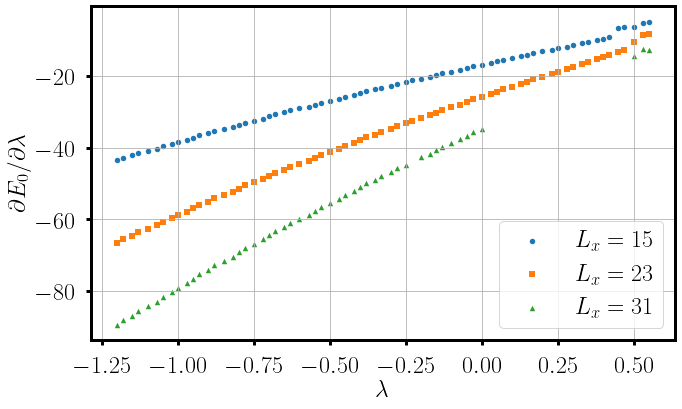

In [20]:
# Derivates of energy
plt.figure(figsize=(10,10/1.61))
#plt.scatter(L15Lam[1:], np.diff(L15energy/15,1), lw=0,marker='o',s=30, label= r'$L_x=15$')
#plt.scatter(L23Lam[1:], np.diff(L23energy/23,1), lw=0,marker='s',s=30, label= r'$L_x=23$')
#plt.scatter(L31Lam[1:], np.diff(L31energy/31,1), lw=0,marker='^',s=30, label= r'$L_x=31$')
plt.scatter(L15Lam, L15energy, lw=0,marker='o',s=30, label= r'$L_x=16$')
plt.scatter(L23Lam, L23energy, lw=0,marker='s',s=30, label= r'$L_x=24$')
plt.scatter(L31Lam, L31energy, lw=0,marker='^',s=30, label= r'$L_x=32$')

plt.grid()
#plt.ylim(-0.0004,0.000)
plt.ylabel(r'$\partial E_0/\partial \lambda$')
plt.xlabel(r'$\lambda$')
plt.legend()
save_fig("../imgs/energy_coupling.pdf")

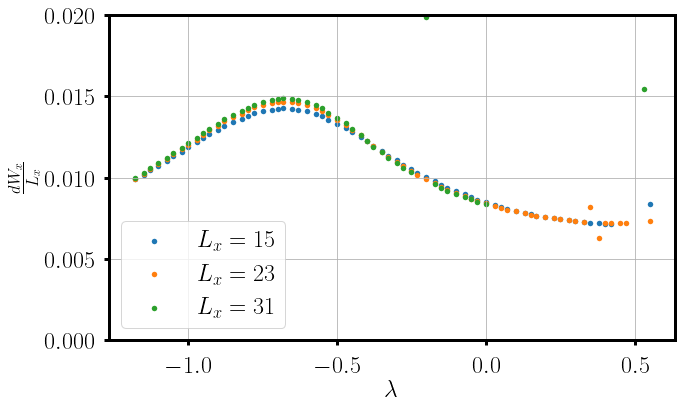

In [40]:
plt.figure(figsize=(10,10/1.61))
plt.scatter(L15Lam[1:], np.diff(L15Wind/15,1), lw=0,marker='o',s=30, label= r'$L_x=16$')
plt.scatter(L23Lam[1:], np.diff(L23Wind/23,1), lw=0,marker='o',s=30, label= r'$L_x=24$')
plt.scatter(L31Lam[1:], np.diff(L31Wind/31,1), lw=0,marker='o',s=30, label= r'$L_x=32$')
plt.grid()
plt.ylim(0.00,0.02)
plt.ylabel(r'$\frac{dW_x}{L_x} $')
plt.xlabel(r'$\lambda$')
plt.legend()
save_fig("../imgs/dWinding_coupling.pdf")

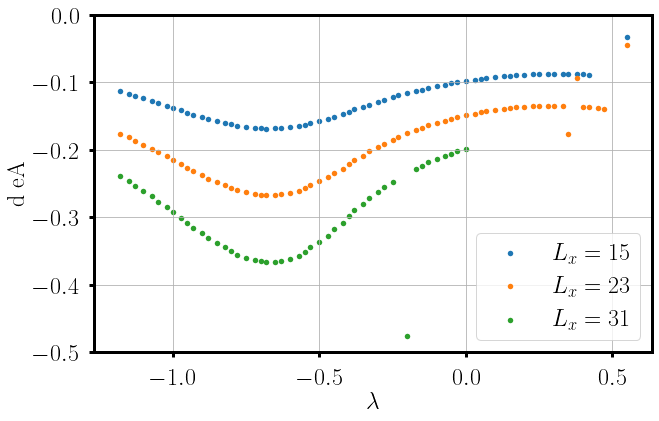

In [13]:
plt.figure(figsize=(10,10/1.61))
plt.scatter(L15Lam[1:], np.diff(L15eA+L15eB,1), lw=0,marker='o',s=30, label= r'$L_x=16$')
plt.scatter(L23Lam[1:], np.diff(L23eA+L23eB,1), lw=0,marker='o',s=30, label= r'$L_x=24$')
plt.scatter(L31Lam[1:], np.diff(L31eA+L31eB,1), lw=0,marker='o',s=30, label= r'$L_x=32$')
plt.grid()
plt.ylim(-0.5,0.00)
plt.ylabel('d eA')
plt.xlabel(r'$\lambda$')
plt.legend()


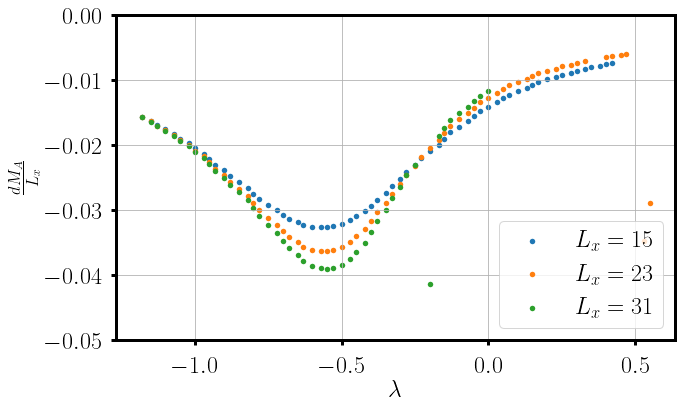

In [44]:
L15Mabs = np.abs(L15MA) + np.abs(L15MB)
L23Mabs = np.abs(L23MA) + np.abs(L23MB)
L31Mabs = np.abs(L31MA) + np.abs(L31MB)
plt.figure(figsize=(10,10/1.61))
plt.scatter(L15Lam[1:], np.diff(L15Mabs/15,1), lw=0,marker='o',s=30, label= r'$L_x=16$')
plt.scatter(L23Lam[1:], np.diff(L23Mabs/23,1), lw=0,marker='o',s=30, label= r'$L_x=24$')
plt.scatter(L31Lam[1:], np.diff(L31Mabs/31,1), lw=0,marker='o',s=30, label= r'$L_x=32$')

plt.grid()
plt.ylim(-0.05,0.00)
plt.ylabel(r'$\frac{d M_A}{L_x}$')
plt.xlabel(r'$\lambda$')
plt.legend()

save_fig("../imgs/MA.pdf")

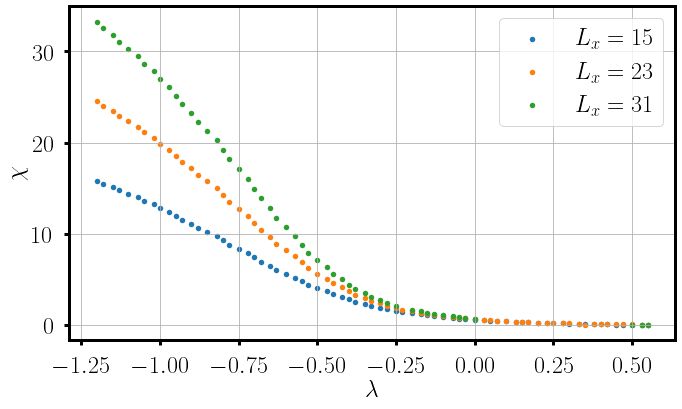

In [15]:
L15chi = L15MA**2 + L15MB**2
L23chi = L23MA**2 + L23MB**2
L31chi = L31MA**2 + L31MB**2
fig = plt.figure(figsize=(10,10/1.61))
plt.scatter(L15Lam, L15chi/15, lw=0,marker='o',s=30, label= r'$L_x=16$')
plt.scatter(L23Lam, L23chi/23, lw=0,marker='o',s=30, label= r'$L_x=24$')
plt.scatter(L31Lam, L31chi/31, lw=0,marker='o',s=30, label= r'$L_x=32$')

plt.grid()
#plt.ylim(-0.05,0.00)
plt.ylabel(r'$\chi$')
plt.xlabel(r'$\lambda$')
plt.legend()
save_fig("../imgs/chi.pdf")
#fig.savefig("chi.pdf",bbox_inches='tight')

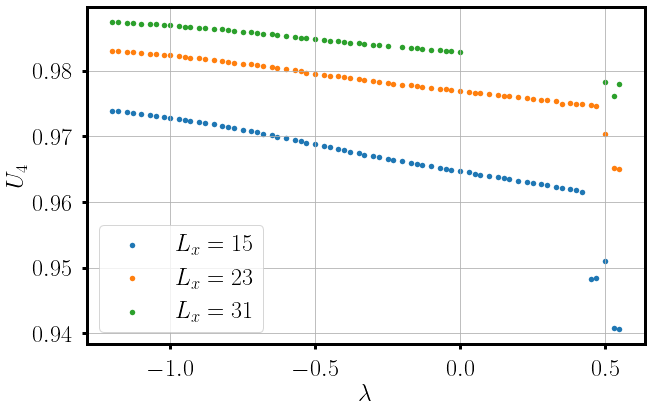

In [16]:
plt.figure(figsize=(10,10/1.61))
plt.scatter(L15Lam, L15U4, lw=0,marker='o',s=30, label= r'$L_x=16$')
plt.scatter(L23Lam, L23U4, lw=0,marker='o',s=30, label= r'$L_x=24$')
plt.scatter(L31Lam, L31U4, lw=0,marker='o',s=30, label= r'$L_x=32$')

plt.grid()
#plt.ylim(-0.05,0.00)
plt.ylabel(r'$U_4$')
plt.xlabel(r'$\lambda$')
plt.legend()


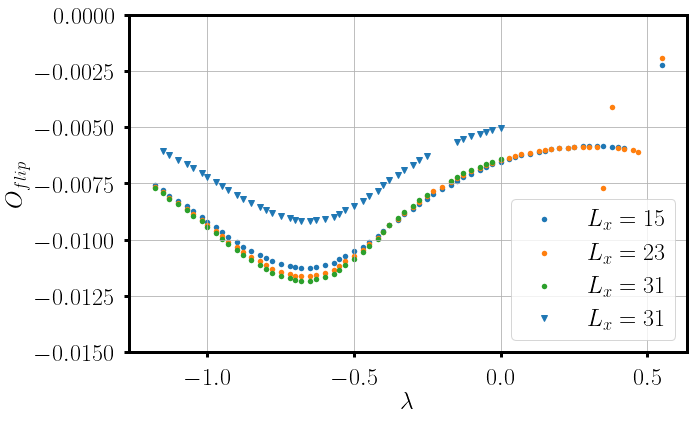

In [50]:
plt.figure(figsize=(10,10/1.61))
plt.scatter(L15Lam[1:], np.diff(L15Of/15), lw=0,marker='o',s=30, label= r'$L_x=16$')
plt.scatter(L23Lam[1:], np.diff(L23Of/23), lw=0,marker='o',s=30, label= r'$L_x=24$')
plt.scatter(L31Lam[1:], np.diff(L31Of/31), lw=0,marker='o',s=30, label= r'$L_x=32$')
plt.plot(L31Lam[2:], np.diff(L31energy,2), lw=0, marker='v' , label= r'$L_x=32$')

plt.grid()
plt.ylim(-0.015,0.00)
plt.ylabel(r'$O_{flip}$')
plt.xlabel(r'$\lambda$')
plt.legend()
